
# Data Visualization with Matplotlib - Exercises 2

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\pawar\AppData\Local\Temp\ipykernel_5608\347984750.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## อ่านไฟล์ Superstore.csv

In [3]:
df = pd.read_csv('Superstore.csv',encoding = 'iso-8859-1')

In [4]:
df.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## Exercise 1

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 และตกแต่งให้สวยงาม


In [6]:
data = df.groupby('Year').sum()['Profit']
x = data.index
y = data


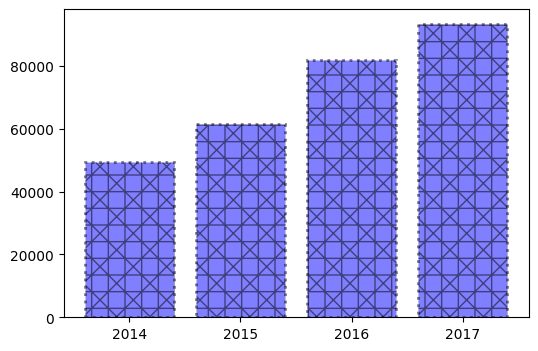

In [7]:
plt.figure(figsize = [6,4])
x = ['2014','2015','2016','2017']
plt.bar(x,y,color = 'b',alpha = 0.5,hatch = '\/-|',lw = 2,ec = 'k',ls = ':')
plt.show()

## Exercise 2

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 ในกราฟเดียวแยกตามหมวดหมู่ พร้อมตกแต่งให้สวยงาม

In [13]:
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']

In [14]:
x = arr_df['Furniture'].index
y = arr_df['Furniture']
z = arr_df['Technology']
c = arr_df['Office Supplies']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


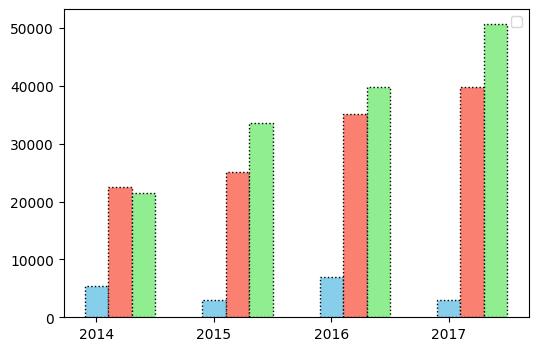

In [10]:
plt.figure(figsize = [6,4 ])
bw = 0.2
plt.bar(x,y,width=0.2,color='skyblue',ec = 'k',ls = ':')
plt.bar(x+0.2,c,width=0.2,color='salmon',ec = 'k',ls = ':')
plt.bar(x+0.2*2,z,width=0.2,color='lightgreen', ec = 'k',ls = ':')
plt.legend(loc = 'best')
plt.xticks([2014,2015,2016,2017])
plt.show()

## Exercise 3

จงวาดกราฟวงกลม แสดงเปอร์เซ็นต์การขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

In [17]:
dataShipMode =df.groupby('Order ID')['Ship Mode'].unique().value_counts()
dataShipModeLabel = ['Standard Class','Standard Class','Standard Class','Standard Class']

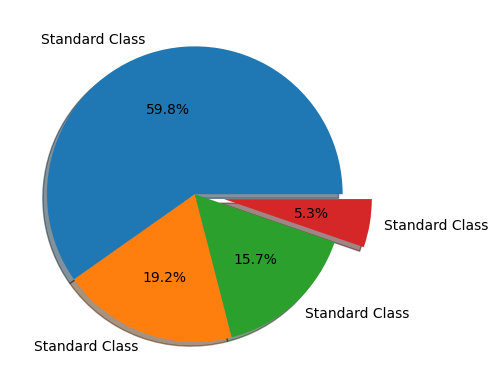

In [18]:
plt.pie(dataShipMode,labels=dataShipModeLabel,explode=[0,0,0,0.2],shadow=True,autopct="%.1f%%")
plt.show()

## Exercise 4

จงวาดกราฟความถี่ แสดงจำนวนการขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

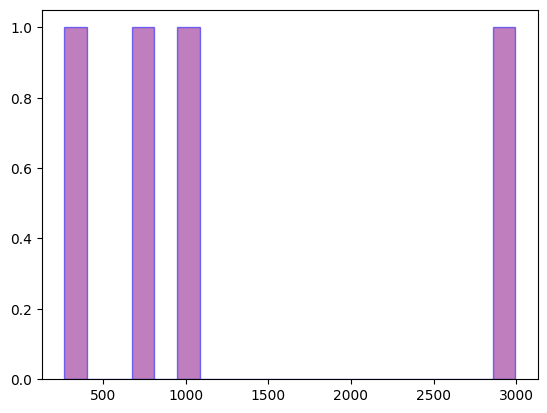

In [26]:
plt.hist(dataShipMode,bins=20,ec='k', color = 'purple', edgecolor='b' ,alpha = 0.5)
plt.show()

## Exercise 5

จงวาดกราฟจุด(Scatter) แสดงราคาขายกับกำไรที่ได้ (Sales , Profit) พร้อมตกแต่งให้สวยงาม

In [27]:
sales = df.Sales
proft = df.Profit

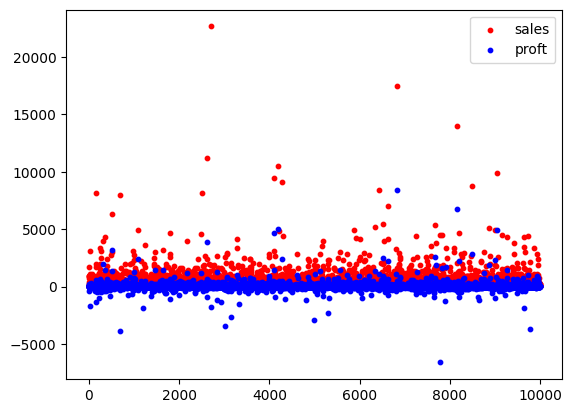

In [29]:
plt.scatter(x = sales.index, y = sales , marker= 'o',c='r',s=10,label = 'sales')
plt.scatter(x = proft.index, y = proft , marker= 'o',c='b',s=10,label = 'proft')
plt.legend(loc = 'best')
plt.show()